# <div style="text-align:center;">**Capuchin Bird Signal Processing**</div>

# 1. Load Dependencies

Since I am using a venv, I am installing the required packages using pip

In [4]:
%pip install matplotlib
%pip install tensorflow==2.8.0
%pip install tensorflow_io==0.24.0

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -------------------------------------- 159.4/159.4 kB 9.3 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.5 MB 15.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.5 MB 19.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.5 MB 20.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.7/7.5 MB 21.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.1/7.5 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 21.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/477.9 kB ? eta -:--:--
   -----------------------------------

To be able to import tensorflow 2.8.0, the photobuf plugin needs to be downgraded to at most 3.20. 

In [6]:
%pip install protobuf==3.20

     ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
     ---------------------------------- -- 849.9/904.4 kB 27.1 MB/s eta 0:00:01
     ------------------------------------- 904.4/904.4 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.1
    Uninstalling protobuf-4.25.1:
      Successfully uninstalled protobuf-4.25.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [4]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import sys

In [5]:
print('tensorflow version:', tf.__version__)
print('tensorflow_io version:', tfio.__version__)
print(sys.version)

tensorflow version: 2.8.0
tensorflow_io version: 0.24.0
3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


Lets export the dependencies used in a txt file.

In [7]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 2. Data Collection

In [8]:
def load_data(file):
    # read the .wav file
    wav, sample_rate = tf.audio.decode_wav(tf.io.read_file(file), desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [7]:
def load_data(file):
    # read the .wav file
    sample_rate, data = wav.read(file)
    data = tf.squeeze(data, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    data = tfio.audio.resample(data, rate_in=sample_rate, rate_out=16000)
    return data

In [12]:
import librosa

In [15]:
def load_data(file):
    # read the .wav file
    sample_rate, data = wav.read(file)
    data = librosa.to_mono(data.T) if len(data.shape) > 1 else data
    data = data.astype(float)
    data = tf.squeeze(data, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    data = tfio.audio.resample(data, rate_in=sample_rate, rate_out=16000)
    return data

## 3. Visualization

In [8]:
sample_rate, data = wav.read('data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav')

In [10]:
capu = load_data(os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC114131-0.wav'))
non_capu = load_data('data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav')
#forest_mix = load_data('data/Forest Recordings/recording_00.wav')

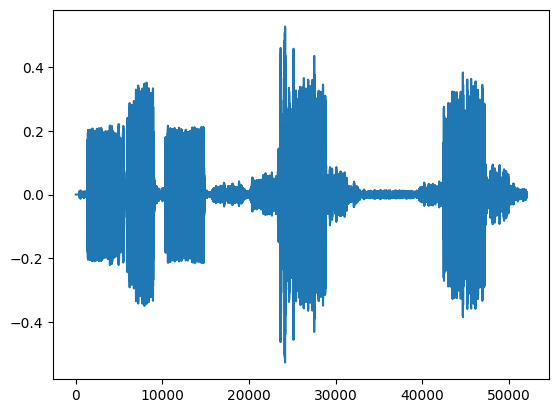

In [12]:
plt.plot(non_capu)